In [49]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [50]:
import os
import pandas as pd

In [51]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [52]:
torch.cuda.set_device(1)

In [53]:
PATH = 'words/'
csv_path = PATH + 'csv_files/c03.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

4366

In [54]:

arch = resnet50
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [55]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 122.5, 97.5, -0.5)

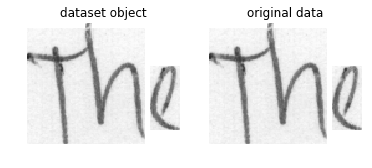

In [56]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [57]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/c03-000a-00-00.png']

In [58]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [59]:
learn = ConvLearner.pretrained(arch, data)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/pedro2/.torch/models/resnet50-19c8e357.pth

100%|██████████| 102502400/102502400 [00:04<00:00, 23476643.68it/s]

 93%|█████████▎| 51/55 [00:29<00:02,  1.72it/s, loss=7.19]

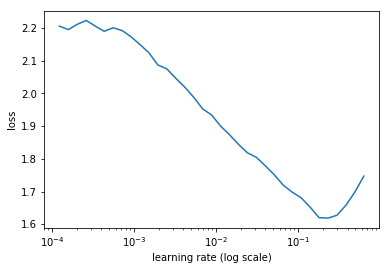

In [60]:
lrf=learn.lr_find()
learn.sched.plot()

In [61]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.965554   0.567655   0.806415  
    1      0.747235   0.435223   0.864834                  
    2      0.606632   0.382723   0.876289                  
    3      0.586032   0.383519   0.857961                  
    4      0.540859   0.336443   0.890034                  
    5      0.473465   0.298342   0.908362                  
    6      0.434755   0.292252   0.906071                  


[array([0.29225]), 0.9060710205654918]

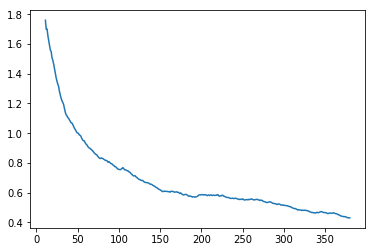

In [62]:
learn.sched.plot_loss()

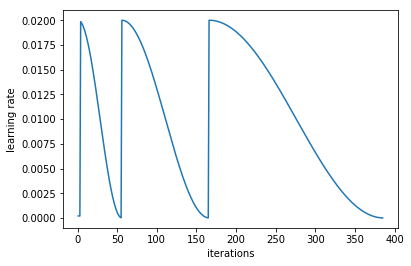

In [63]:
learn.sched.plot_lr()

In [64]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.524434   0.205094   0.924399  
    1      0.341509   0.135329   0.950745                  
    2      0.226709   0.107234   0.963345                  
    3      0.200638   0.12612    0.956472                  
    4      0.154164   0.107452   0.961054                  
    5      0.120888   0.086101   0.972509                  
    6      0.100067   0.080171   0.972509                  


[array([0.08017]), 0.9725085921577026]

In [65]:
learn.save(f'{sz}')

In [66]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [67]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [68]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 89%|████████▉ | 49/55 [00:27<00:03,  1.78it/s, loss=10.2]

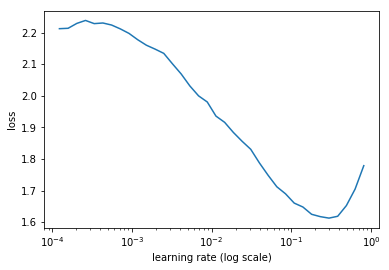

In [69]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [70]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.957392   0.604855   0.790378  
    1      0.727182   0.429174   0.845361                  
    2      0.585396   0.377182   0.87858                   
    3      0.551347   0.365206   0.879725                  
    4      0.515196   0.334852   0.880871                  
    5      0.452537   0.31346    0.888889                  
    6      0.412271   0.303308   0.89118                   


[array([0.30331]), 0.891179839018967]

In [71]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.526287   0.207638   0.930126  
    1      0.350133   0.135392   0.942726                  
    2      0.239691   0.114405   0.957617                  
    3      0.222001   0.162627   0.942726                  
    4      0.185589   0.095108   0.959908                  
    5      0.133034   0.086494   0.972509                  
    6      0.10976    0.079654   0.970218                  


[array([0.07965]), 0.9702176414131436]

In [72]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [73]:
accuracy_np(preds, y)

0.9736540664375716

In [74]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [75]:
accuracy_np(preds,y)

0.97709049255441